# 103 In-Class Assignment: Solving Linear Systems of equations


### Agenda for today's class

</p>

1. [Review pre-class assignment](#Pre-class_assignment_review)
1. [Jacobi Method for solving Linear Equations](#Jacobi_Method_for_solving_Linear_Equations)
1. [Numerical Error](#Numerical_Error)
2. [Solving Square Systems of Linear Equations Using Numpy](#Solving-Systems-of-Linear-Equations)
    1. [Built-In Solver](#built-in)
    1. [Inverse Matrix](#inverse)
1. [Practice   Curve Fitting Example](#Practice---Curve-Fitting-Example)
1. [Non-square Systems](#nonsquare-Systems)
1. [Generalize the procedure](#Generalize_the_procedure)
1. [Basic Gauss Jordan](#Basic_Gauss_Jordan)
1. [Interpreting Types of solutions from RREF](#rref-solutions)
1. [Invertible Matrix Theorem](#invertible-matrix)


---
<a name="Pre-class_assignment_review"></a>
## 1. Pre-class assignment review


[03--Linear_Equations_pre-class-assignment.ipynb](03--Linear_Equations_pre-class-assignment.ipynb)


---
<a name="Jacobi_Method_for_solving_Linear_Equations"></a>

## 2. Jacobi Method: Iterative method for solving Linear Equations

<img src="http://profilerehab.com/facebook_covers/groundhog_day/groundhog_day_images_3.jpg" alt="Picture of groundhog day movie poster. " width=70%>

In the movie Groundhog day the main character "Phil" repeats the same day over and over again.  This is an iterative process where Phil learns from past mistakes until he has a "perfect" day.  The Groundhog movie is a fun analogy of iterative methods for solving linear equations. 
During class today we will write an iterative method (named after Carl Gustav Jacob Jacobi) to solve the following system of equations:

$$ 6x + 2y - ~z = 4~$$
$$~ x + 5y + ~z = 3~$$
$$ 2x +~ y + 4z = 27$$

Here is a basic outline of the Jacobi method algorithm:

1. Initialize each of the variables as zero ($x_0 = 0, y_0 = 0, z_0 = 0$) 
2. Calculate the next iteration using the above equations and the values from the previous iterations. For example here is the formula for calculating $x_i$ from $y_{(i-1)}$ and $z_{(i-1)}$ based on the first equation:
    $$x_i = \frac{4 - 2y_{(i-1)} + z_{(i-1)}}{6} $$
    Similarly, we can obtain the update for $y_i$ and $z_i$ from the second and third equations, respectively.
3. Increment the iteration counter $(i = i + 1)$ and repeat Step 2.
4. Stop when the answer "converges" or a maximum number of iterations has been reached. (ex. $i$ = 100)

**IMPORTANT NOTE:** 

> A sufficient (but not necessary) condition for the method to converge is that the matrix A is strictly or irreducibly [diagonally dominant](https://en.wikipedia.org/wiki/Diagonally_dominant_matrix). Strict row diagonal dominance means that for each row, the absolute value of the diagonal term is greater than the sum of absolute values of other terms. - From [Wikipedia](https://en.wikipedia.org/wiki/Jacobi_method)

In other words, the Jacobi Methid will not work an all problems.  

&#9989; **<font color=red>DO THIS:</font>** Write out the equations for $x_i$, $y_i$, and $z_i$ based on $x_{(i-1)}$, $y_{(i-1)}$, and $z_{(i-1)}$. 

**Note.** Make sure to use a different equation for each of the $x_i$, $y_i$, and $z_i$.

Put your answer to the above question here.

&#9989; **<font color=red>DO THIS:</font>** Complete the following code by adding formulas for $y_i$ and $z_i$ to solve the above equations using the Jacobi method.  

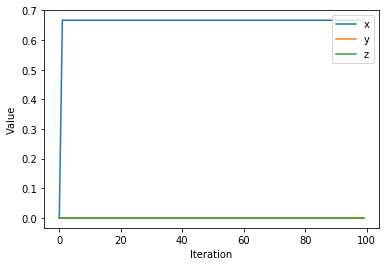

In [1]:
%matplotlib inline
import matplotlib.pylab as plt

x = []
y = []
z = []

#step 1: inicialize to zero
x.append(0)
y.append(0)
z.append(0)

for i in range(1,100):
    xi = (4 - 2*y[i-1]+ z[i-1])/6
#####Start your code here #####
    yi = 0 #Change this line
    zi = 0 #Change this line
#####End of your code here#####        
    #Add latest value to history
    x.append(xi)
    y.append(yi)
    z.append(zi)

#Plot History of values
plt.plot(x, label='x')
plt.plot(y, label='y')
plt.plot(z, label='z')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.legend(loc=1);

 &#9989; **<font color=red>QUESTION:</font>**  What are the final values for $x$, $y$, and $z$?

$$x = $$
$$y = $$
$$z = $$

&#9989; **<font color=red>DO THIS:</font>** Write out each of the above equations and show that your final result is a solution to the system of equations:

In [2]:
# Put your code here

 &#9989; **<font color=red>QUESTION:</font>**  By inspecting the graph, how long did it take for the algorithum to converge to a solution?  

Put your answer to the above question here.

 &#9989; **<font color=red>QUESTION:</font>**  How could you rewrite the above program to stop earlier.  

Put your answer to the above question here.

---
<a name="Numerical_Error"></a>

## 3. Numerical Error

Consider the following python statement when answering the questions below:

In [3]:
0.1 + 0.2 == 0.3

False

 &#9989; **<font color=red>QUESTION:</font>**  Why does Python return **False** even though the above statement is clearly true?

Put your answer to the above question here.

 &#9989; **<font color=red>DO THIS:</font>** Let's consider another example.  Run the following code which should return true.  

In [4]:
import numpy as np
J = np.array([20])
L = [20]

pow(L[0],8) == pow(J[0],8)

True

If you have an older version of ```numpy``` installed (like 1.18.5) then the results of running the above cell may be false (did anyone get this result?).  This is because ```numpy```
changed how it handles something called "roundoff error". here is another cell that may help you see better what is going on:

In [5]:
import numpy as np
J = np.array([20])
L = [20]
print(pow(20,8))
print(pow(L[0],8))
print(pow(J[0],8))

25600000000
25600000000
25600000000


The older version of ```numpy``` would return the following:

```
25600000000
25600000000
-169803776
```
We could say to always upgrade to the latest stable version (generally a good idea). But some other libraries that depend on numpy may not be up to date so sometimes python will install an older version to maintain compatibility. For example, one really popular program is tensorflow, which often requires an older version of numpy. 

 &#9989; **<font color=red>QUESTION:</font>** If Python is sometimes wrong, why do we use it? 

Put your answer to the above question here.

 &#9989; **<font color=red>QUESTION:</font>** What are ways you can do to watch out for these types of errors?  

Put your answer to the above question here.

 &#9989; **<font color=red>QUESTION:</font>** Modify the following program to return **True** if the values are within some small number (```e```) of each other.

In [6]:
def checktrue(a,b,e=0.001):
    return a == b

#Test function
checktrue(0.1+0.2, 0.3)

False

 &#9989; **<font color=red>QUESTION:</font>** What is a good value to set for ```e``` and why?

Put your answer to the above question here.

&#9989; **<font color=red>QUESTION:</font>** The errors seen in this example seem like they would be fairly common in Python.  See if you can find a function in ```Numpy``` that has the same purpose as  ```checktrue```:

**_Put your answer to the above question here._**

The class ```answercheck``` program will take into consideration round off error.  For example, the ```checkanswer.float``` command would consider both of the above correct:

In [7]:
from answercheck import checkanswer

checkanswer.float(0.300,'e85b79abfd76b7c13b1334d8d8c194a5');

ModuleNotFoundError: No module named 'answercheck'

In [ ]:
checkanswer.float(0.1+0.2,'e85b79abfd76b7c13b1334d8d8c194a5')



---
<a name=Solving-Systems-of-Linear-Equations></a>
## 2. Solving  Square Systems of Linear Equations Using Numpy


Remember the following set of equations from the mass weight example:

<img src="https://lh4.googleusercontent.com/48AcnVEBkzXJ_heu4fR0DbP5BBunyRlzPsTeK8WSBsMTSjZ5QNhdhtnVsdAw7wD0NBITIiSmh9Jn0gTPABkxqDa-LrhRicZGdpfbYakgWjJetZfOPk636Eu-vjmj=w740" align="center" width="70%" alt="Image showing two balanced beams, each with three weights. In the top beam is unknown weight A is a distance of 40 to the left of the fulcrum, unknown weight B is a distance of 15 to the left of the fulcrum and a weight of 2 is 50 to the right of the fulcrum. In the bottom beam is the same unknown weights.  Weight A is now a distance of 50 to the right of the fulcrum, weight B is a distance of 25 to the left of the fulcrum and the weight of 2 is a distance of 25 to the right of the fulcrum.">
$$40A + 15B = 100$$
$$25B = 50 + 50A$$


As you know, the above system of equations can be written as an Augmented Matrix in the following form:


$$ 
\left[
\begin{matrix}
    40  & 15  \\
    -50 & 25  
 \end{matrix}
\, \middle\vert \,
\begin{matrix}
100 \\ 50 
\end{matrix}
\right] 
$$



&#9989; **<font color=red>QUESTION:</font>**  Split apart the augmented matrix  ($ 
\left[
\begin{matrix}
    A
 \end{matrix}
\, \middle\vert \,
\begin{matrix}
b
\end{matrix}
\right] 
$) into it's left size ($2 \times 2$) matrix $A$ and it's right ($2x1$) matrix $b$. Define the matrices $A$ and $b$ as ```numpy``` matrices:

In [ ]:
#Put your code here
import numpy as np

In [ ]:
from answercheck import checkanswer

checkanswer.matrix(A,'f5bfd7c52824d5ac580d0ce1ab98fe68');

In [ ]:
from answercheck import checkanswer

checkanswer.matrix(b,'c760cd470439f5db82bb165edf4dc3f8');

<a name='built-in'></a>
### The built-in equation solver.

The function ``np.linalg.solve`` works very well to come up to solutions to a system of equations given in matrix format, $Ax = b$. However, there is the caveat that it only works when the matrix $A$ is square.

&#9989; **<font color=red>QUESTION:</font>**  Solve the above system of equations using the ```np.linalg.solve``` function and store the value in a vector named ``x``:

In [ ]:
# Put your code to the above question here

In [ ]:
from answercheck import checkanswer

checkanswer.vector(x,'fc02fe6d0577c4452ee70252e1e17654');

<a name='inverse'></a>
### Using the inverse matrix.

When we know that the square matrix $A$ has an inverse matrix $A^{-1}$, then solving $Ax=b$ is simple, just multiply both sides of the equation by $A^{-1}$ and you get:

$$A^{-1}Ax = A^{-1}b$$

If we apply the definition of the inverse matrix from above we can reduce the equation to:

$$Ix = A^{-1}b$$

We know $I$ times $x$ is just $x$  (definition of the identity matrix), so this further reduces to:

$$x = A^{-1}b$$

To conclude, solving $Ax=b$ when you know $A^{-1}$ is really simple.  All you need to do is multiply $A^{-1}$ by $b$ and you know $x$.


&#9989; **<font color=red>QUESTION:</font>**  Compute the inverse matrix for $A$ using ```np.linalg.inv```. Find the solution to the system of equations $Ax=b$ by computing  $x_2 = A^{-1}b$:

In [ ]:
##Define x2 to be the (inverse of A) times b
x2 = 0

In [ ]:
np.allclose(x,x2)


---
<a name=Practice---Curve-Fitting-Example></a>
## 3. Practice   Curve Fitting Example

Consider the following polynomial with constant scalars $a$, $b$, and $c$, that falls on the $xy$-plane:

$$f(x) = ax^2 + bx + c$$


&#9989; **<font color=red>QUESTION:</font>**  Is this function linear? Why or why not?

Put your answer to the above question here.

Assume that we do not know the values of $a$, $b$ and $c$, but we do know that the points (1,2), (-1,12), and (2,3) are on the polynomial. We can substitute the known points into the equation above. For eample, using point (1,2) we get the following equation:

$$2 = a1^2 + b1 + c$$
$$\text{or}$$
$$2 = a + b + c$$

&#9989; **<font color=red>QUESTION:</font>**  Generate two more equations by substituting points (-1,12) and (2,3) into the above equation:

Put your answer to the above question here. (See if you can use latex as I did above)

&#9989; **<font color=red>QUESTION:</font>**  If we did this right, we should have three equations and three unknowns ($a,b,c$).  Note also that these equations are linear (how did that happen?).  Transform this system of equations into two matrices $A$ and $b$ like we did above.

In [ ]:
#Put your answer to the above question here.

In [ ]:
from answercheck import checkanswer

checkanswer.matrix(A,'1896041ded9eebf1cba7e04f32dd1069');

In [ ]:
from answercheck import checkanswer

checkanswer.matrix(b,'01e594bb535b4e2f5a04758ff567f918');

&#9989; **<font color=red>QUESTION</font>** Write the code to solve for $x$ (i.e., ($a,b,c$)) using ```numpy```.

In [ ]:
#Put your answer to the above question here.

In [ ]:
from answercheck import checkanswer

checkanswer.vector(x,'1dab22f81c2c156e6adca8ea7ee35dd7');

&#9989; **<font color=red>QUESTION</font>** Given the value of your ```x``` matrix derived in the previous question, what are the values for $a$, $b$, and $c$?

In [ ]:
#Put your answer to the above question here.
a = 0
b = 0
c = 0

Assuming the above is correct, the following code will print your 2nd order polynomial and plot the original points:

In [ ]:
x = np.linspace(-3,3)
y = a*x**2 + b*x + c

#plot the function. (Transpose is needed to make the data line up).
plt.plot(x,y.transpose())

#Plot the original points
plt.scatter(1, 2)
plt.scatter(-1, 12)
plt.scatter(2, 3)
plt.xlabel('x-axis')
plt.ylabel('y-axis')

&#9989; **<font color=red>QUESTION</font>** The following program is intended to take four points as inputs ($p1, p2, p3, p4 \in R^2$) and calculate the coefficients $a$, $b$, $c$, and $d$ so that the graph of $f(x) = ax^3 + bx^2 + cx + d$ passes smoothly through the points.  Test the function with the following points (1,2), (-1,6), (2,3), (3,2) as inputs and print the values for $a$, $b$, $c$, and $d$.

In [ ]:
def fitPoly3(p1,p2,p3,p4):
    A = np.matrix([[p1[0]**3, p1[0]**2, p1[0], 1],
                   [p2[0]**3, p2[0]**2, p2[0], 1],
                   [p3[0]**3, p3[0]**2, p3[0], 1],
                   [p4[0]**3, p4[0]**2, p4[0], 1]])
    
    b = np.matrix([p1[1],p2[1],p3[1],p4[1]]).T

    X = np.linalg.solve(A, b)
    a = X[0]
    b = X[1]
    c = X[2]
    d = X[3]
    #Try to put your figure generation code here for the next question 
    #####Start your code here #####
    
    
    #####End of your code here#####       
    return (a,b,c,d)

In [ ]:
#put your answer to the above question here

&#9989; **<font color=red>QUESTION</font>** Modify the above ```fitpoly3``` function to also generate a figure of the input points and the resulting polynomial in range ```x=(-3,3)```. 

In [ ]:
# Put the answer to the above question above or copy and paste the above function and modify it in this cell. 

&#9989; **<font color=red>QUESTION</font>** Give any four $R^2$ input points to ```fitPoly3```, is there always a unique solution?  Explain your answer. 

Put your answer to the above question here.

---
<a name=nonsquare-Systems></a>
## 4. Solutions to non-square systems


When we solve a system of equations of the form $Ax=b$, we may have three outcomes: 

- a unique solution
- no solution (We say the system of equations is **inconsistent** if there is no solution.)
- infinity many solutions

Assume that we have $m$ equations and $n$ unkowns so $A$ is an $m \times n$ matrix.

- **Case 1:** We say that a system of linear equations is **underdetermined** if we have more unknowns than equations. This means we have $m < n$, and we do not have enough equations to pin down all our variables. In this case there can be only **TWO** possible outcomes: no solution, or infinity many solutions. 


- **Case 2** When $A$ is square we have $m = n$, and we may have all **THREE** outcomes. If the matrix is invertible, we have a unique solution, otherwise, we have to decide the outcome based on the augmented matrix $[A | b]$.


- **Case 3** We say that a system of linear equations is **overdetermined** if we have more equations than unknowns. Hence, $m>n$. We may have all **THREE** outcomes. It depends on whether the extra equations are repeated, or conflict with each other.

All of the methods to solve systems of equations in matrix form we have talked about so far (np.linalg.solve, inverse, and Jacobi) explicitly require that the matrix $A$ in $Ax=b$ is square. We can exam the number of solutions (none, one, infinitely many), by examining the reduced row echelon form of the augmented matrix $[A|b].$


We look at the last several rows (could be zero) with all zeros except the last column. 

If one element from the corresponding right hand side is not zero, when we rewrite our augmented matrix in equation form we have that $0$ equals some nonzero number, which is impossible. Therefore, there is no solution. E.g., 

$$\left[
\begin{matrix}
    1 & 0 & 0  \\
    0 & 1 & 0  \\
    0 & 0 & 1  \\
    0 & 0 & 0
 \end{matrix}
 \, \middle\vert \,
\begin{matrix}
2 \\ 3 \\ 4 \\ 5
\end{matrix}
\right] 
$$
In this case, we say that the system is *inconsistent*. Later in the semester we will look into methods that try to find a "good enough" solution for an inconsistant system (regression). 

Otherwise, we remove all the rows with all zeros (which is the same as removing redundant equations). 
If the number of remaining equations is the same as the number of unknowns, the rref is an identity matrix, and we have unique solution. E.g.,
$$\left[
\begin{matrix}
    1 & 0 & 0  \\
    0 & 1 & 0  \\
    0 & 0 & 1  \\
    0 & 0 & 0
 \end{matrix}
 \, \middle\vert \,
\begin{matrix}
2 \\ 3 \\ 4 \\ 0
\end{matrix}
\right] 
 \Rightarrow \left[
\begin{matrix}
    1 & 0 & 0  \\
    0 & 1 & 0  \\
    0 & 0 & 1  \\
 \end{matrix}
 \, \middle\vert \,
\begin{matrix}
2 \\ 3 \\ 4 
\end{matrix}
\right] $$

If the number of remaining equations is less than the number of unknowns, we have infinitely many solutions. Consider the following three examples. **We will discuss how we arrived at the solution vector from the RREF in the example below.**

$$\left[
\begin{matrix}
    1 & 0 & 0  \\
    0 & 1 & 0  \\
    0 & 0 & 0
 \end{matrix}
 \, \middle\vert \,
\begin{matrix}
2 \\ 3  \\ 0
\end{matrix}
\right] 
 \Rightarrow \left[
\begin{matrix}
    1 & 0 & 0  \\
    0 & 1 & 0  \\
 \end{matrix}
 \, \middle\vert \,
\begin{matrix}
2 \\ 3  
\end{matrix}
\right] \Rightarrow x= [2, 3, x_3]^\top $$
where $x_3$ is a free variable.

$$\left[
\begin{matrix}
    1 & 2 & 0  \\
    0 & 0 & 1  \\
    0 & 0 & 0
 \end{matrix}
 \, \middle\vert \,
\begin{matrix}
2 \\ 3  \\ 0
\end{matrix}
\right] 
 \Rightarrow \left[
\begin{matrix}
    1 & 2 & 0  \\
    0 & 0 & 1  \\
 \end{matrix}
 \, \middle\vert \,
\begin{matrix}
2 \\ 3  
\end{matrix}
\right]  \Rightarrow x= [2-2x_2, x_2, 3]$$
where $x_2$ is a free variable.

$$\left[
\begin{matrix}
    1 & 2 & 0 & 1 \\
    0 & 0 & 1 & 3 \\
    0 & 0 & 0 & 0
 \end{matrix}
 \, \middle\vert \,
\begin{matrix}
2 \\ 5  \\ 0
\end{matrix}
\right] 
 \Rightarrow \left[
\begin{matrix}
    1 & 2 & 0 & 1 \\
    0 & 0 & 1 & 3 \\
 \end{matrix}
 \, \middle\vert \,
\begin{matrix}
2 \\ 5 
\end{matrix}
\right]  \Rightarrow x= [2-2x_2-x_4, x_2, 5-3x_4, x_4]$$
where $x_2$ and $x_4$ are free variables.

### Example

$$\begin{bmatrix}5&-2&2 & 1 \\ 4 & -3 &4 &2  \\ 4& -6 &7  & 4\end{bmatrix}\begin{bmatrix}x_1\\x_2\\x_3\\x_4\end{bmatrix}=\begin{bmatrix}1\\2\\3\end{bmatrix}$$

&#9989; **<font color=red>QUESTION</font>** Define an augmented matrix $M$ that represents the above system of equations:

In [ ]:
#Put your code here

In [ ]:
from answercheck import checkanswer

checkanswer.matrix(M,'efb9b2da0e44984a18f595d7892980e2');

In addition to ``numpy`` Python also offers the ```sympy``` library which has a "reduced row echelon form" (rref) function that runs a much more efficient version of the Gauss-Jordan function than the one we will soon create.  To use the ```rref``` function you must first convert your matrix into a ```sympy.Matrix``` called ``M_sym`` and then call ``M_sym.rref()``. 

&#9989; **<font color=red>QUESTION</font>** What is the Reduced Row Echelon form for $M$?

In [ ]:
# Put your answer to the above question here

In [ ]:
from answercheck import checkanswer
checkanswer.detailedwarnings=False
checkanswer.matrix(RREF,'f1fa8baac1df4c378db20cff9e91ca5b');

Notice how the above RREF form of matrix M is different from what we have seen in the past.  In this case not all of our values for $x$ are unique. When we write down a solution to this problem by defining the variables by one or more of the undefined variables.  for example, here we can see that $x_4$ is undefined.  So we say $x_4 = x_4$, i.e. $x_4$ can be any number we want.  Then we can define $x_3$ in terms of $x_4$.  In this case $x_3 = \frac{11}{15} - \frac{4}{15}x_4$.  The entire solution can be written out as follows:

$$
\begin{align*} 
x_1 &= \frac{1}{15} + \frac{1}{15}x_4 \\
x_2 &= \frac{2}{5} + \frac{2}{5}x_4 \\
x_3 &= \frac{11}{15} - \frac{4}{15}x_4 \\
x_4 &= x_4 
\end{align*}
$$

&#9989; **<font color=red>DO THIS</font>** Review the above answer and make sure you understand how we get this answer from the Reduced Row Echelon form from above. 

Sometimes, in an effort to make the solution more clear, we introduce new variables (typically, $r,s,t$) and substitute them in for our undefined variables so the solution would look like the following:


$$
\begin{align*} 
x_1 &= \frac{1}{15} + \frac{1}{15}r \\
x_2 &= \frac{2}{5} + \frac{2}{5}r \\
x_3 &= \frac{11}{15} - \frac{4}{15}r \\
x_4 &= r 
\end{align*}
$$

We can find a particular solution to the above problem by inputing any number for $r$.  For example, set r equal to zero and create a vector for all of the $x$ values.


$$
\begin{align*} 
x_1 &= \frac{1}{15}\\
x_2 &= \frac{2}{5}\\
x_3 &= \frac{11}{15}  \\
x_4 &= 0
\end{align*}
$$

In [ ]:
##here is the same basic math in python

r = 0
x = np.matrix([1/15+1/15*r, 2/5+2/5*r, 11/15-4/15*r, r]).T
x

Now let us check our answer by multipying matrix $A$ by our solution $x$ and see if we get $b$

In [ ]:
A = M[:,:-1]
b = M[:,-1]
np.allclose(A*x,b)

&#9989; **<font color=red>DO THIS</font>** Now go back and pick a different value for $r$ and see that it also produces a valid solution for $Ax=b$.

In [ ]:
#Load Useful Python Libraries 
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
import sympy as sym
sym.init_printing(use_unicode=True)

----
<a name="Generalize_the_procedure"></a>
## 2. Explore the Gauss-Jordan procedure

So far we have done a lot of dancing around the Gauss-Jordan method. Specifically, the Gauss-Jordan method is an algorithm for starting with any matrix $A$ and using elementary row-operations to produce the reduced row echelon form of $A$. The function built into ``sympy`` is good for carrying this out, but now we want to get our hands dirty and see what is going on under the hood. 

Think about Gauss-Jordan as an algorithm. First I want you to think about how you would generalize the procedure to take any matrix to its RREF. Do the following before moving on to the next section. 


&#9989;**<font color=red>DO THIS</font>**: Use the following matrix to think about how you would solve any system of equations using the Gauss-Jordan elimination algorithm.  Focus on the steps. 


$$ 
\left[
\begin{matrix}
    a & b & c  \\
    e & f & g  \\
    i & j & k 
 \end{matrix}
\, \middle\vert \,
\begin{matrix}
d \\ h \\ l
\end{matrix}
\right] 
$$



&#9989;**<font color=red>QUESTION</font>**: What are the first three mathematical steps you would do to put the above equation into reduced row echelon form using Gauss-Jordan method?

Put your answer here. 

### Pseudocode

&#9989;**<font color=red>QUESTION</font>**: Write down the steps you would complete to implement the Gauss-Jordan elimination algorithm as a computer programer. Some questions to answer:

1. What are the inputs?
2. What are the outputs?
3. How many and what types of loops would you have to guarantee success of your program?

Once you have thought this though the instructor will work with you to build the algorithm.

----

<a name="Basic_Gauss_Jordan"></a>

## 3. Basic Gauss Jordan

The following is implementation of the Basic Gauss-Jordan Elimination Algorithm for Matrix $A^{m\times n}$ (Pseudocode):
```bash
for i from 1 to m:
    for j from 1 to m	
        if i ≠ j:
            Ratio = A[j,i]/A[i,i]
            #Elementary Row Operation 3
            for k from 1 to n:
                A[j,k] = A[j,k] - Ratio * A[i,k]
            next k
        endif
    next j
    
    #Elementary Row Operation 2
    Const = A[i,i]
    for k from 1 to n:
        A[i,k] = A[i,k]/Const
next i
```

&#9989;**<font color=red>DO THIS</font>**: Using the Pseudocode provided above, write a ```basic_gauss_jordan``` function which takes a list of lists $A$ as input and returns the modified list of lists:

In [ ]:
# Put your answer here. 

Lets check your function by applying the ```basic_gauss_jordan``` function and check to see if it matches the answer from matrix $A$ in the pre-class video:

In [ ]:
A = [[1, 1, 1, 2], [2, 3, 1, 3], [0, -2, -3, -8]]
answer = basic_gauss_jordan(A)
sym.Matrix(answer)

In [ ]:
answer_from_video = [[1, 0, 0, -1], [0, 1, 0, 1], [0, 0, 1, 2]]
np.allclose(answer, answer_from_video)

The above psuedocode does not quite work properly for all matrices. For example, consider the following augmented matrix:

$$ 
B = \left[
\begin{matrix}
    0 & 1 & 33\\ 
    5 & 3 & 7 \\
    6 & 69 & 4
 \end{matrix}
 \, \middle\vert \,
\begin{matrix}
 30 \\ 
 90 \\
 420
\end{matrix}
\right] 
$$

&#9989;**<font color=red>QUESTION</font>**: Explain why doesn't the provided ```basic_gauss_jordan``` function work on the matrix $B$? 

Put your answer to the above question here.

&#9989;**<font color=red>QUESTION</font>**: Describe how you could modify matrix $B$ so that it would work with ```basic_gauss_jordan``` AND still give the correct solution? 

Put your answer to the above question here.

In [ ]:
# Put your code here

----

The following are deeper thought questions that you should do if you have enough time in class.

&#9989; **<font color=red>QUESTION:</font>**  Assume that a system of equations is consistent (has at least one solution), explain why the number of equations can not be larger than the number of unknowns after the redundant equations are removed? 

Put the solution to the above question here.

&#9989; **<font color=red>DO THIS:</font>** If there are two solutions for $Ax=b$, that is $Ax=b$ and $Ax'=b$ while $x\neq x'$. Check that $A(cx+(1-c)x') = b$ for any real number $c$. Therefore, if we have two different solutions, we have infinite many solutions. 

**Hint.** This is easier to write out with paper and pencil.

Put the solution to the above question here.

---
<a name='invertible-matrix'></a>
## Invertible Matrix Theorem

The [Invertible Matrix Theorem](https://mathworld.wolfram.com/InvertibleMatrixTheorem.html) is one of the most important results of a first linear algebra course. It gives (roughly) 23 equivalent condtions for when a matrix is invertible. We have already learned enough to state 5 of the 23 criteria. We will revisit this theorem as we learn more. 

**Invertible Matrix Theorem.** A square $n \times n$ matrix $A$ is said to be **invertible** if any of the following equivalent conditions hold. 

1. There exists an inverse matrix $B$ such that $AB=BA=I_n$.
1. The reduced row echelon form of $A$ is the identity matrix.
1. The echelon form of A has $n$ pivot positions.
1. The system of equations $Ax=0$ has only the trivial solution $Ax=0$.
1. For each column vector $b \in \mathbb{R}^n$ there is a unique solution to the system of equations $Ax=b$.

---------
### Congratulations, we're done!

###EndInClass###

### Course Resources:





Written by Dr. Dirk Colbry, Michigan State University
<a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/">Creative Commons Attribution-NonCommercial 4.0 International License</a>.